### $\color{royalblue}{\text{ Друга вјежба из нумеричких метода у астрономији, датум: 11.12.2025.}} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from astropy.io import fits

#### $\color{magenta}{\text{Галактичке координате - интензитет зрачења.}}$

Операције са *fits* фајлом.

In [2]:
podaci = fits.open('gll_iem_v02_P6_V11_DIFFUSE.fit')
podaci.info()

Filename: gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


In [3]:
podaci[0].header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

In [4]:
podaci[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    8 / width of table in bytes                        
NAXIS2  =                   30 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    1 / number of fields in each row                   
TTYPE1  = 'Energy  '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
EXTNAME = 'ENERGIES'           / name of this binary table extension            
CHECKSUM= 'LALON5IOLAIOL3IO'   / HDU checksum updated 2009-07-07T22:31:18       
DATASUM = '3169948818'      


Учитавање података.

In [5]:
intenzitet = podaci[0].data # мапа интензитета зрачења на одговарајућој енергији у галактичким координатама
energija = podaci[1].data # енергије на којима је израчунат интензитет

print(intenzitet.shape, energija.shape)

(30, 360, 720) (30,)



Прављење координатне мреже.

In [6]:
longituda = np.arange(-180, 180, step = 0.5)
print(longituda.shape)

latituda = np.arange(90, -90, step = -0.5)
print(latituda.shape)

longituda, latituda = np.meshgrid(longituda, latituda)
print(longituda.shape, latituda.shape)

(720,)
(360,)
(360, 720) (360, 720)


In [8]:
e = np.round(energija[13][0], 5)
print(f'Нека енергија: {e} MeV')

Нека енергија: 1509.18358 MeV


Контуре на некој од датих енергија.

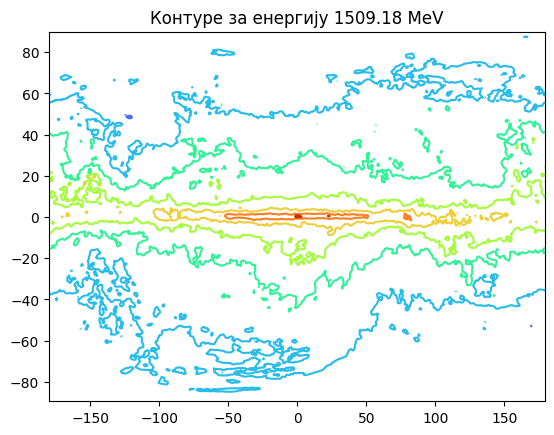

In [11]:
plt.contour(longituda, latituda, np.log10(intenzitet[13]), cmap='turbo')
# plt.contourf(longituda, latituda, intenzitet[13], cmap='jet')
# plt.imshow(intenzitet[13], extent=(-180, 180, -90, 90), cmap='jet', origin='lower')

# plt.colorbar()
plt.title('Контуре за енергију {} MeV'.format(np.round(energija[13][0], 2)))
plt.show()

Више "подграфика" - може се ставити заједнички *colorbar* за сваки *subplot* или да појединачни *colorbar* имају универзално скалирање.

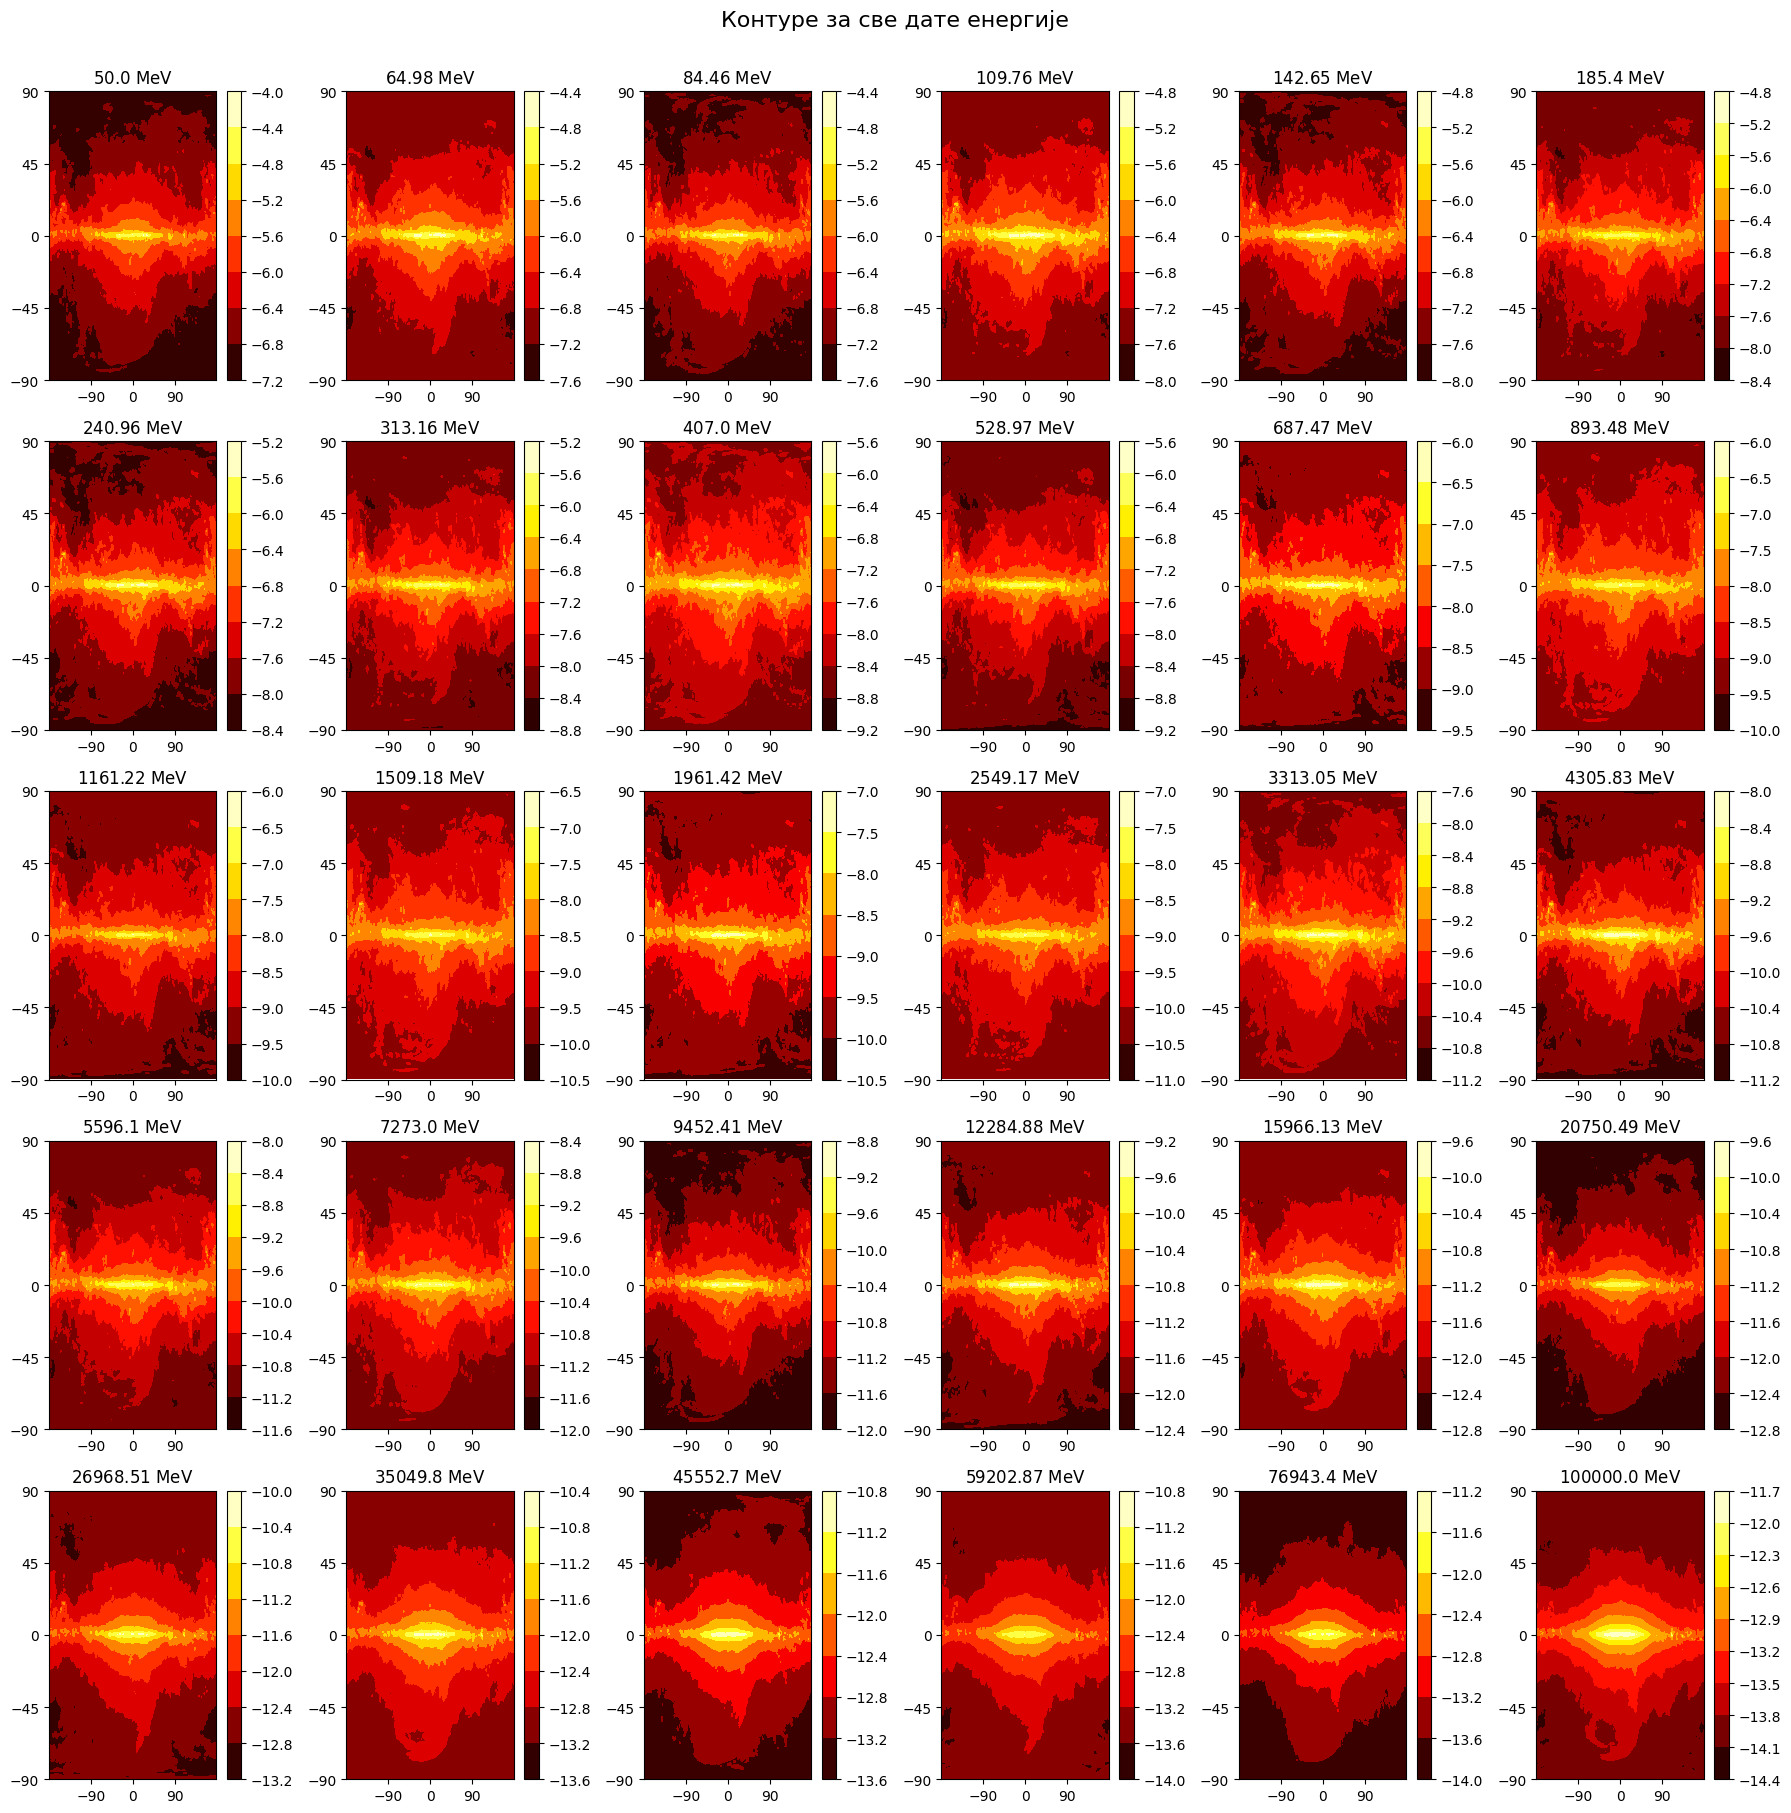

In [14]:
fig, axs = plt.subplots(5, 6, figsize=(18, 18))

for i in range(30):
    red = int(np.floor(i / 6))
    kolona = i - (red) * 6
    im = axs[red, kolona].contourf(longituda, latituda, np.log10(intenzitet[i]), cmap='hot')
    axs[red, kolona].title.set_text(r'${}$ MeV'.format(np.round(energija[i][0], 2)))
    axs[red, kolona].set_xticks(np.arange(-90, 180, step=90))
    axs[red, kolona].set_yticks(np.arange(-90, 135, step=45))
    
    plt.colorbar(im)

plt.suptitle('Контуре за све дате енергије', fontsize=16, y=1.005)
plt.tight_layout()
plt.show()

#### $\color{magenta}{\text{Спектар Сунчевог зрачења.}}$

Дужина низа таласних дужина: 2001


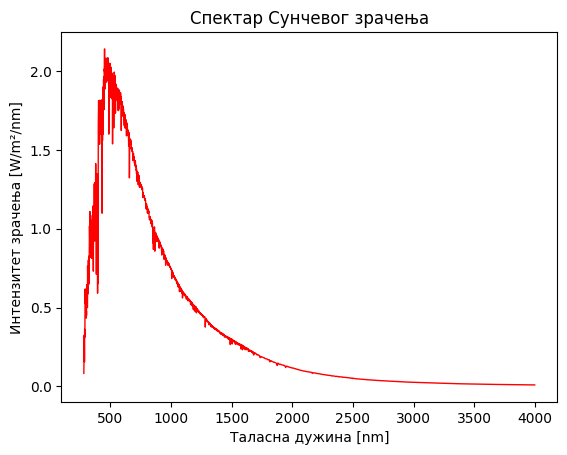

In [16]:
l, I = np.loadtxt('Spektar Sunca.txt', delimiter=',', skiprows=2, unpack=True)

print('Дужина низа таласних дужина:', len(l))

plt.plot(l, I, linewidth=1, color='red')
plt.xlabel('Таласна дужина [nm]')
plt.ylabel('Интензитет зрачења [W/m²/nm]')
plt.title('Спектар Сунчевог зрачења')
plt.show()

In [17]:
print('Средњи интензитет зрачења:', np.mean(I))
print('Максимални интензитет зрачења:', np.max(I))
print('Минимални интензитет зрачења:', np.min(I))   
print('Стандардна девијација интензитета зрачења:', np.std(I))
print('Медијана интензитета зрачења:', np.median(I)) 

Средњи интензитет зрачења: 0.677633728135932
Максимални интензитет зрачења: 2.142
Минимални интензитет зрачења: 0.00868
Стандардна девијација интензитета зрачења: 0.588470616718476
Медијана интензитета зрачења: 0.51012


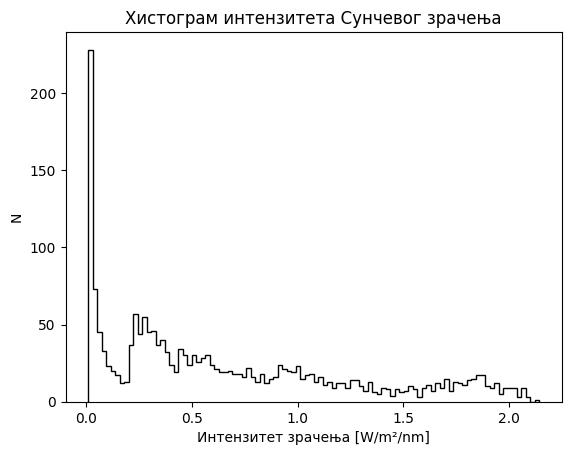

In [18]:
plt.hist(I, bins=100,  histtype='step', color='black')
plt.xlabel('Интензитет зрачења [W/m²/nm]')
plt.ylabel('N')
plt.title('Хистограм интензитета Сунчевог зрачења')
plt.show() 

#### $\color{magenta}{\text{Мјесечева кора.}}$


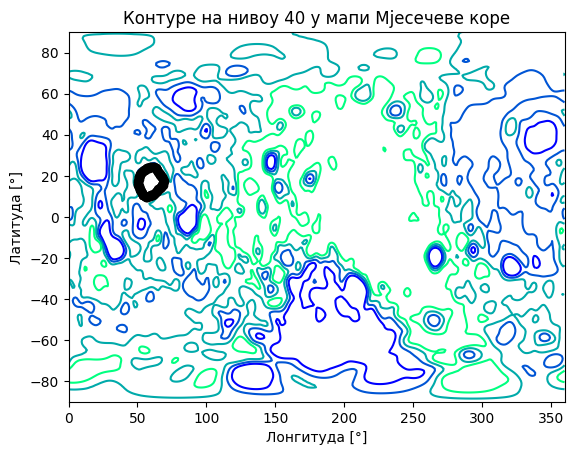

In [19]:
D = np.loadtxt('Moon_crust.dat')
D = np.reshape(D,[180,360])

longituda = np.linspace(0,360,360)
latituda = np.linspace(-90,90,180)
  
X, Y = np.meshgrid(longituda, latituda)

# colormaps: binary, bone, pink, spring, summer, winter, cool, hot, copper, jet

mapa_boja = plt.colormaps.get_cmap('winter')

nivoi = np.arange(40,80,10) # дефинишемо нивое на којима желимо да цртамо контуре
konture = plt.contour(X,Y,D,levels=nivoi,cmap=mapa_boja) # плотујемо контуре на задатим нивоима
koordinate = konture.allsegs 
nivo0 = koordinate[0] # индекс нам говори на ком смо нивоу (дебљини) изабрали контуре
kontura = nivo0[14] # индекс нам говори коју контуру (тачке) желимо да издвојимо са тог нивоа (дебљине)

# на овај начин можемо да одредимо све тачке на некој 2D мапи података које су на истом нивоу

longituda0 = kontura[:,0] 
latituda0 = kontura[:,1] 
plt.plot(longituda0, latituda0, marker='o', color='black') 
plt.xlabel('Лонгитуда [°]')
plt.ylabel('Латитуда [°]')
plt.title('Контуре на нивоу {} у мапи Мjесечеве коре'.format(nivoi[0]))
plt.show()

Неке друге пројекције.

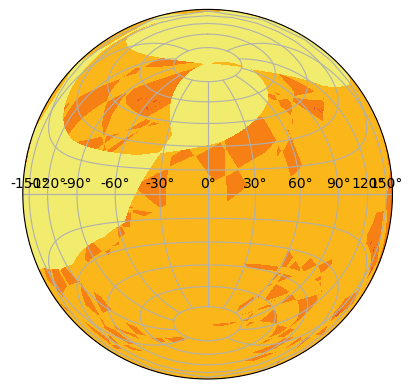

In [ ]:
# projekcija=plt.subplot(1,1,1, projection = 'rectilinear')
# projekcija=plt.subplot(1,1,1, projection = 'hammer')
# projekcija=plt.subplot(1,1,1, projection = 'aitoff')
# projekcija=plt.subplot(1,1,1, projection = 'mollweide')
projekcija = plt.subplot(projection = 'lambert')

mapa_boja = plt.colormaps.get_cmap('inferno')
projekcija.contourf(X, Y, D, cmap = mapa_boja) # експериментисати

# нијеми плот
plt.grid()
plt.show()

#### $\color{magenta}{\text{Топографија Марса.}}$

(720, 1440) (720, 1440)


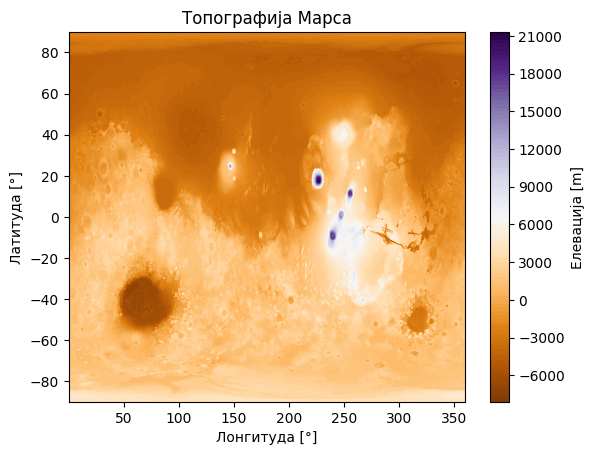

In [25]:
h = np.loadtxt('topografija.dat', skiprows=2)
r = np.loadtxt('radijus.dat')
print(h.shape, r.shape)
longituda=np.arange(0.125, 360, step=0.25)
latituda=np.arange(-89.875, 90, step=0.25)
longituda, latituda = np.meshgrid(longituda, latituda)

plt.contourf(longituda, latituda, h, 100, cmap='PuOr')
cbar=plt.colorbar()
cbar.set_label('Елевација [m]')
plt.xlabel(r'Лонгитуда [°]')
plt.ylabel(r'Латитуда [°]')
plt.title('Топографија Марса')
plt.show()

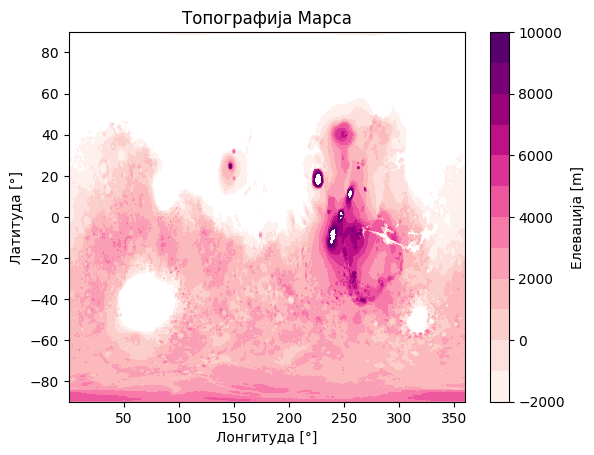

In [26]:
# плотовање контура са одређеним нивоима

nivoi=np.arange(-2000, 11000, step=1000)

plt.contourf(longituda, latituda, h, levels=nivoi, cmap='RdPu')
cbar=plt.colorbar()
cbar.set_label('Елевација [m]')
plt.xlabel(r'Лонгитуда [°]')
plt.ylabel(r'Латитуда [°]')
plt.title('Топографија Марса')
plt.show()

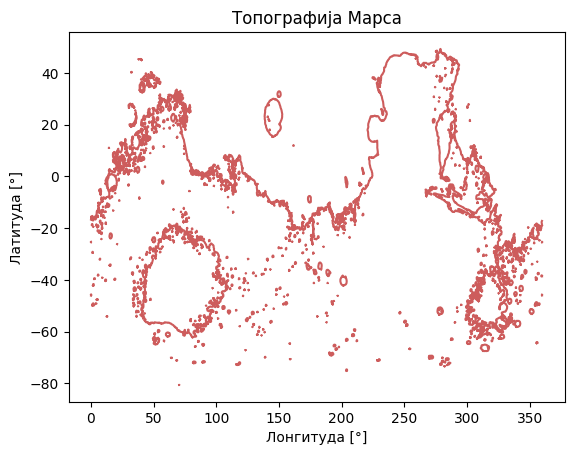

In [28]:
# ако желимо да исцртамо све контуре неком нивоу

for i in range(0, len(nivo0)): # број контура на дебљини од 40m
    kontura = nivo0[i]
    longituda0 = kontura[:,0] # латитуде тачака на дебљини 40 m
    latituda0 = kontura[:,1] # лонгитуде тачака на дебљини 40 m
    plt.plot(longituda0, latituda0, color='indianred') # плотовање тих тачака на истој мапи

plt.xlabel(r'Лонгитуда [°]')
plt.ylabel(r'Латитуда [°]')
plt.title('Топографија Марса')
plt.show()

Вјежба -  на топографској мапи Марса плотовати контуре "нивоа мора"; све испод обојити у плаво, а све изнад у црвено.

/tmp/ipykernel_111454/3014636789.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mapa_boja = plt.cm.get_cmap('turbo')


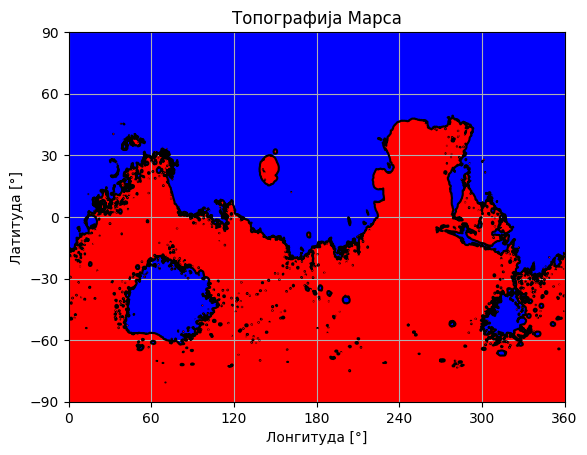

In [ ]:
mapa_boja = plt.cm.get_cmap('turbo')
mapa_boja.set_under('blue')
mapa_boja.set_over('red')
plt.contourf(longituda,latituda,h,levels=[0, 0.01],cmap=mapa_boja, extend='both')

# ["neither", "both", "min", "max"]

konture=plt.contour(longituda, latituda, h, levels=[0], colors='black')

plt.xlabel(r'Лонгитуда [°]')
plt.ylabel(r'Латитуда [°]')
plt.title('Топографија Марса')

plt.xticks(np.arange(0, 361, step=60))
plt.yticks(np.arange(-90,91, step=30))
plt.grid()
plt.show()

Тродимензионални плот.

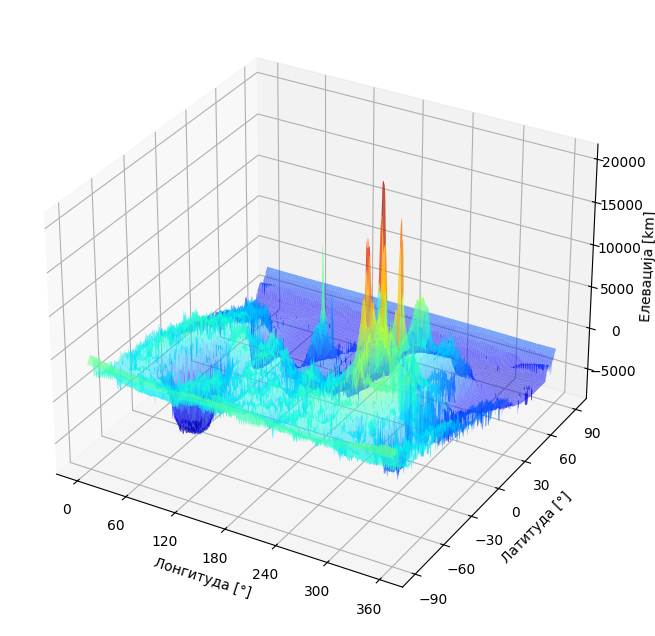

In [30]:
fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(1,1,1, projection='3d')
 
ax.plot_surface(longituda, latituda, h, rstride=10, cstride=10, cmap='jet', alpha=0.5)

# facecolors = cm.jet(h/np.max(h)), alpha=0.5)

ax.set_xticks(np.arange(0,361,step=60))
ax.set_yticks(np.arange(-90,91,step=30))
ax.set_xlabel(r'Лонгитуда [°]')
ax.set_ylabel(r'Латитуда [°]')
ax.set_zlabel(r'Елевација [km]')

ax.grid()
plt.show()

Сферни плот.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
 
latituda = np.deg2rad(latituda)
longituda = np.deg2rad(longituda)

r = 3e4 # произвољно

X = r * np.cos(latituda) * np.cos(longituda)
Y = r * np.cos(latituda) * np.sin(longituda)
Z = r * np.sin(latituda)
 
mapa = plt.cm.ScalarMappable(cmap='PuOr')
boja = mapa.to_rgba(h) # нормализује вриједности h у распону [0,1] и додељује им боје из колор мапе

plot = ax.plot_surface(X, Y, Z,rstride=5, 
                  cstride=5, 
                 cmap=cm.jet, facecolors=boja)

ax.grid('off')

### $\color{green}{\text{Задаци:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />


1. Користећи фајл 'Spektar Sunca.txt' наћи таласне дужине на којима је интензитет зрачења максималан и минималан.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

2.  Испод се налази кратак код:

```
import numpy as np

e=0.05

M=2.56
tacnost=1e-8


delta=2*tacnost

E=M

br=0

while np.abs(delta)>tacnost:

    br+=1
    
    f=E-e*np.sin(E)-M
    
    fprim=1-e*np.cos(E)
   
    delta=f/fprim
    
    E=E-delta

print(E)
print(br)

```

Модификовати код тако да рачуна вриједности ексцентричне аномалије за низ вриједности средње аномалије од $0$ до $2π$, за

више вриједности ексцентрицитета (нпр. e=0.05, 0.2, 0.5)

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />
